# 台灣確診者各縣市分布趨勢圖 Trend of Conformed Case in Taiwan, Taipei

In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from matplotlib import dates
pd.options.mode.chained_assignment = None
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
r = requests.post(
    'https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.json')
r.encoding = 'uft-8'

df = pd.read_json(StringIO(r.text.replace("/", "-")))

mdf = pd.DataFrame(columns=['Time', '台北市', '新北市', 'others'])
mdf['Time'] = pd.date_range(
    start="2021-05-17", end=(datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d'))
mdf = mdf.replace(np.nan, 0)

In [3]:
for i in range(len(mdf)):
    for j in range(len(df)):
        date = str(df['個案研判日'][j])[0:4]+'-'+str(df['個案研判日']
                                                [j])[4:6]+'-'+str(df['個案研判日'][j])[6:8]
        if (date == mdf['Time'][i].strftime('%Y-%m-%d')):
            if (df['縣市'][j] == '台北市'):
                mdf['台北市'][i] = df['確定病例數'][j] + mdf['台北市'][i]
            elif (df['縣市'][j] == '新北市'):
                mdf['新北市'][i] = df['確定病例數'][j] + mdf['新北市'][i]
            else:
                mdf['others'][i] = df['確定病例數'][j] + mdf['others'][i]

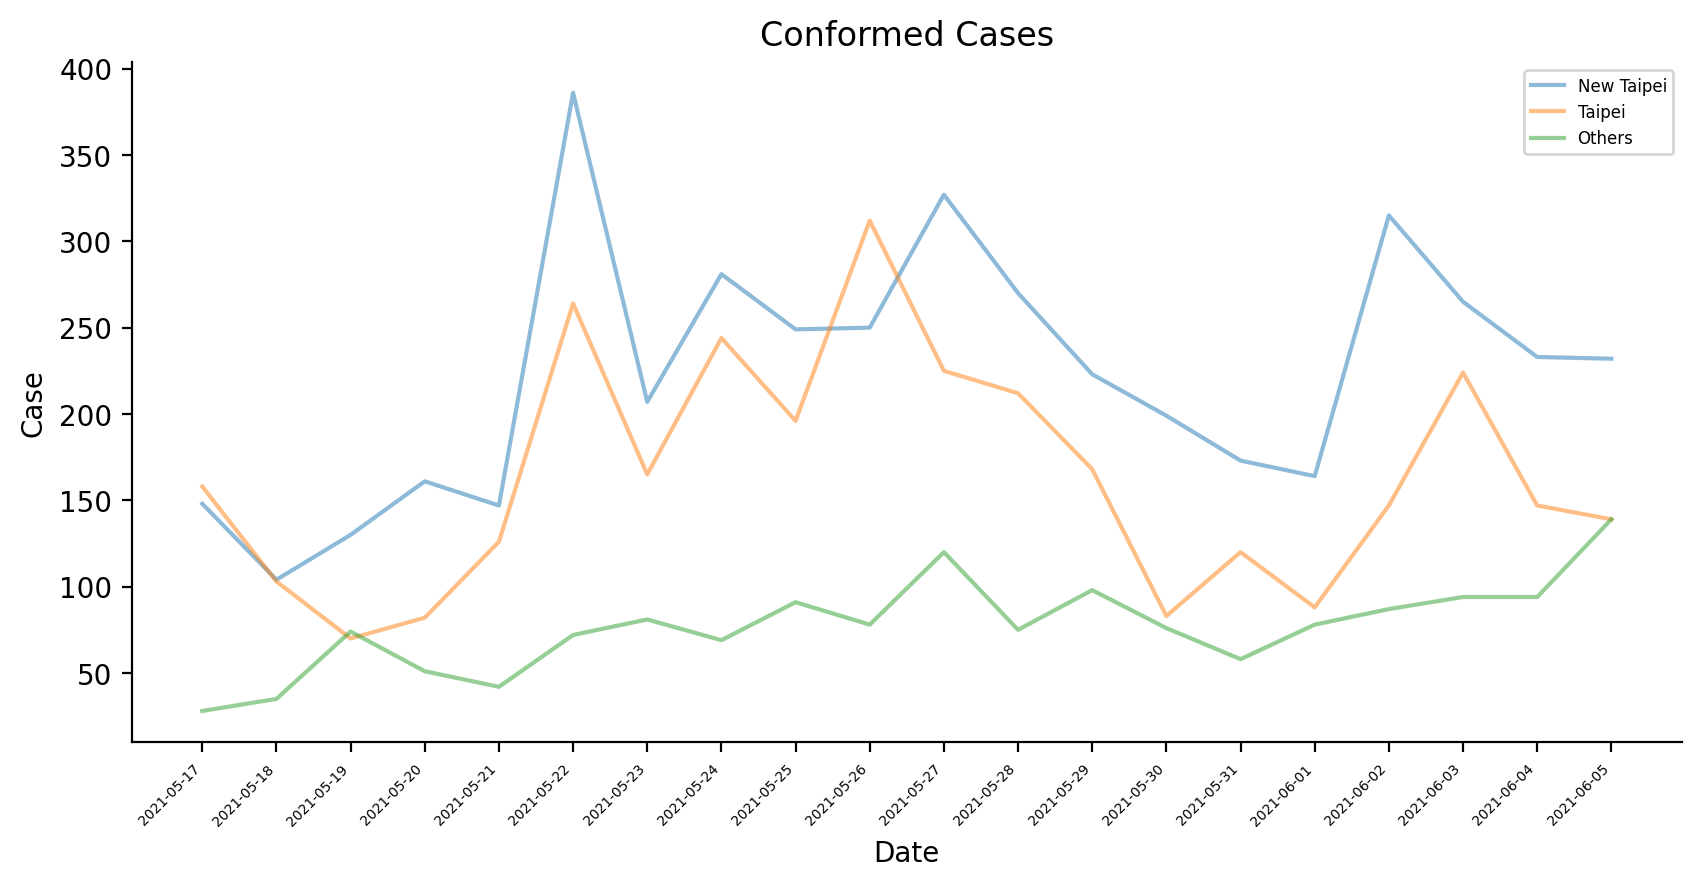

In [4]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(mdf["Time"], mdf["新北市"], alpha=0.5, label="New Taipei")
plt.plot(mdf["Time"], mdf["台北市"], alpha=0.5, label="Taipei")
plt.plot(mdf["Time"], mdf["others"], alpha=0.5,
        label="Others")
plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Conformed Cases')
plt.show()

In [5]:
print(mdf)

         Time  台北市  新北市  others
0  2021-05-17  158  148      28
1  2021-05-18  103  104      35
2  2021-05-19   70  130      74
3  2021-05-20   82  161      51
4  2021-05-21  126  147      42
5  2021-05-22  264  386      72
6  2021-05-23  165  207      81
7  2021-05-24  244  281      69
8  2021-05-25  196  249      91
9  2021-05-26  312  250      78
10 2021-05-27  225  327     120
11 2021-05-28  212  270      75
12 2021-05-29  168  223      98
13 2021-05-30   83  199      76
14 2021-05-31  120  173      58
15 2021-06-01   88  164      78
16 2021-06-02  147  315      87
17 2021-06-03  224  265      94
18 2021-06-04  147  233      94
19 2021-06-05  139  232     139


## Reference
* **疾病管制署開放資料(Taiwan CDC open-source database):** https://data.cdc.gov.tw/dataset/agsdctable-day-19cov.
